<a href="https://colab.research.google.com/github/flowergum/Colorization/blob/main/My_colorization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, \
                                    Dense, \
                                    MaxPool2D,\
                                    Dropout, \
                                    Flatten, \
                                    BatchNormalization, InputLayer, UpSampling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img
from skimage.color import rgb2lab, lab2rgb
import tensorflow as tf
from skimage.io import imsave
import numpy as np
from google.colab import files
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
def processed_image(img):
  image = img.resize( (128, 128), Image.BILINEAR)
  image = np.array(image, dtype=float)
  size = image.shape
  lab = rgb2lab(1.0/255*image)
  X, Y = lab[:,:,0], lab[:,:,1:]

  Y /= 128    # нормируем выходные значение в диапазон от -1 до 1
  X = X.reshape(1, size[0], size[1], 1)
  Y = Y.reshape(1, size[0], size[1], 2)
  return X, Y, size

In [3]:
def pr_img():
    x_train = np.zeros((10, 128, 128, 1))
    y_train = np.zeros((10, 128, 128, 2))
    for i in range(10):
        name = 'drive/MyDrive/Colorization/Step_1.Small_dataset/color/' + str(i+1) + '.jpg'
        img = Image.open(name)
        x_train[i], y_train[i], size = processed_image(img)
    return x_train, y_train


In [4]:
img = Image.open('drive/MyDrive/Colorization/Step_1.Small_dataset/color/1.jpg')
X, Y, size = processed_image(img)
print(X.shape, '     ', Y.shape)

(1, 128, 128, 1)       (1, 128, 128, 2)


In [5]:
x_train, y_train = pr_img()

In [32]:
model = Sequential()
model.add(InputLayer(input_shape=(None, None, 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2))) #Растягивает картинку
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))

In [33]:
model.compile(optimizer='adam', loss='mse')

In [34]:
model.fit(x=x_train, y=y_train, batch_size=2, epochs=100)

Epoch 1/100
5/5 [==============================] - 2s 362ms/step - loss: 0.6278
Epoch 2/100
5/5 [==============================] - 2s 357ms/step - loss: 0.5832
Epoch 3/100
5/5 [==============================] - 2s 359ms/step - loss: 0.1282
Epoch 4/100
5/5 [==============================] - 2s 364ms/step - loss: 0.0160
Epoch 5/100
5/5 [==============================] - 2s 363ms/step - loss: 0.0130
Epoch 6/100
5/5 [==============================] - 2s 357ms/step - loss: 0.0170
Epoch 7/100
5/5 [==============================] - 2s 361ms/step - loss: 0.0134
Epoch 8/100
5/5 [==============================] - 2s 361ms/step - loss: 0.0077
Epoch 9/100
5/5 [==============================] - 2s 360ms/step - loss: 0.0158
Epoch 10/100
5/5 [==============================] - 2s 361ms/step - loss: 0.0163
Epoch 11/100
5/5 [==============================] - 2s 356ms/step - loss: 0.0100
Epoch 12/100
5/5 [==============================] - 2s 357ms/step - loss: 0.0147
Epoch 13/100
5/5 [===================

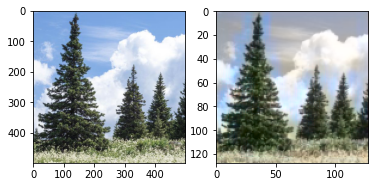

In [40]:
img = Image.open('drive/MyDrive/Colorization/Step_1.Small_dataset/color/8.jpg')
X, Y, size = processed_image(img)

output = model.predict(X)

output *= 128
min_vals, max_vals = -128, 127
ab = np.clip(output[0], min_vals, max_vals)

cur = np.zeros((size[0], size[1], 3))
cur[:,:,0] = np.clip(X[0][:,:,0], 0, 100)
cur[:,:,1:] = ab
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.subplot(1, 2, 2)
plt.imshow(lab2rgb(cur))